## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Inspecting transfusion.data file

In [10]:
!head -n5 ./data/transfusion.data 

Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),"whether he/she donated blood in March 2007"
2 ,50,12500,98 ,1
0 ,13,3250,28 ,1
1 ,16,4000,35 ,1
2 ,20,5000,45 ,1


## Loading the blood donations data

In [11]:
blood_donation_df = pd.read_csv('./data/transfusion.data')
blood_donation_df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [13]:
blood_donation_df.shape

(748, 5)

We have 748 rows and 5 columns in our dataset


## Inspecting transfusion DataFrame

In [14]:
blood_donation_df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [15]:
blood_donation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


Using the info function on our dataset we find that all the columns are integer type and no null values are present in the dataset.

Let's have a look at some statistical information related to our dataset.

In [21]:
blood_donation_df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


The max value for Monetary is 12500 cc while the minimum value is 250 cc

In [23]:
blood_donation_df.isnull().sum() # This line confirms that our dataset is free from null values

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

## Creating target column

The target column for us is the 'whether he/she donated blood in March 2007' column becuase our aim is to predict wether a blood donor will donate within a given time window. So it will be our target column. We can rename it to target for better access

In [24]:
blood_donation_df.rename(
    columns={'whether he/she donated blood in March 2007': 'Target'},
    inplace=True
)

In [25]:
blood_donation_df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


Here 1 means that the doner donated in 2007 while 0 means that they didnt donate

## Checking target incidence

In [30]:
total_ones = blood_donation_df.Target.sum() # Total people who donated in 2007
total_entries_in_target = blood_donation_df.Target.count() # Total records
total_zeroes = total_entries_in_target - total_ones # Total people who didnt donate in 2007

In [32]:
donated_percent = total_ones*100/total_entries_in_target
donated_percent

23.796791443850267

In [34]:
did_not_donated_percent = total_zeroes*100/total_entries_in_target
did_not_donated_percent

76.20320855614973

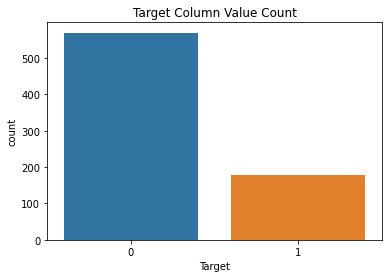

In [81]:
plt.title('Target Column Value Count')
sns.countplot(x="Target", data=blood_donation_df);

## Splitting transfusion into train and test datasets

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    blood_donation_df.drop(columns='Target'),
    blood_donation_df.Target,
    test_size=0.20,
    random_state=42,
    stratify=blood_donation_df.Target
)

In [40]:
X_train.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
529,2,6,1500,22
271,16,7,1750,28
455,21,1,250,21
175,11,10,2500,35
309,16,3,750,19


In [41]:
y_train.head()

529    1
271    0
455    0
175    0
309    0
Name: Target, dtype: int64

## Selecting model using TPOT

In [43]:
!pip install tpot

  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11959 sha256=cf7bf3a06392712f519f9b4ec94296e653056354355db29d3af461a755f33dd6
  Stored in directory: c:\users\aditya jetely\appdata\local\pip\cache\wheels\a8\bb\8f\6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit


In [67]:
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

tpot_classifier = TPOTClassifier(
    generations=5,
    population_size=100,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot_classifier.fit(X_train, y_train)


Generation 1 - Current best internal CV score: 0.7460550533210633
Generation 2 - Current best internal CV score: 0.7460550533210633
Generation 3 - Current best internal CV score: 0.7462514916011382
Generation 4 - Current best internal CV score: 0.7505022018033369
Generation 5 - Current best internal CV score: 0.7507280013839235
Best pipeline: LogisticRegression(VarianceThreshold(GaussianNB(Normalizer(MaxAbsScaler(input_matrix), norm=l1)), threshold=0.0005), C=10.0, dual=False, penalty=l2)


TPOTClassifier(config_dict='TPOT light', disable_update_check=True,
               generations=5,
               log_file=<ipykernel.iostream.OutStream object at 0x0000029C23339040>,
               random_state=42, scoring='roc_auc', verbosity=2)

In [68]:
tpot_auc_score = roc_auc_score(y_test, tpot_classifier.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot_classifier.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')


AUC score: 0.7672

Best pipeline steps:
1. MaxAbsScaler()
2. Normalizer(norm='l1')
3. StackingEstimator(estimator=GaussianNB())
4. VarianceThreshold(threshold=0.0005)
5. LogisticRegression(C=10.0, random_state=42)


## Checking the variance

In [71]:
X_train.var().round(3)

Recency (months)              67.473
Frequency (times)             32.624
Monetary (c.c. blood)    2039028.756
Time (months)                599.952
dtype: float64

## Log Normalization

Undergoing Log Normalization and Maxbs Scalar in order to normalixe the Monetary column , this is one of the important parts of the preprocessing step

In [92]:
from sklearn.preprocessing import MaxAbsScaler
X_train_scaled, X_test_scaled = X_train.copy(), X_test.copy()
col_to_scale = 'Monetary (c.c. blood)'

transformer = MaxAbsScaler().fit_transform(X_train_scaled)
transformer = MaxAbsScaler().fit_transform(X_test_scaled)

In [93]:
X_train_normed, X_test_normed = X_train.copy(), X_test.copy()

col_to_normalize = 'Monetary (c.c. blood)'

for df_ in [X_train_normed, X_test_normed]:
    df_['monetary_log'] = np.log(df_[col_to_normalize])
    df_.drop(columns=col_to_normalize, inplace=True)

We again check the variance after performing normalization

In [94]:
X_train_normed.var().round(3)

Recency (months)      67.473
Frequency (times)     32.624
Time (months)        599.952
monetary_log           0.834
dtype: float64

## Training the linear regression model

The model suggested for us bu TPOT is Logistic Regression with C value 10 so we will follow that

In [95]:
from sklearn import linear_model

model = linear_model.LogisticRegression(
    C= 10,
    solver='liblinear',
    random_state=42
)

model.fit(X_train_normed, y_train)

model_auc_score = roc_auc_score(y_test, model.predict_proba(X_test_normed)[:, 1])
print(f'\nAUC score: {model_auc_score:.4f}')


AUC score: 0.7929


## Conclusion

We have a pretty decent AUC score of 0.79 which was achieved by following steps of the pipeline as suggested by TPOT 

Now let us save our model for future use and for deployment purpose.

In [98]:
import pickle
filename='model.pkl'
pickle.dump(model, open(filename, 'wb'))